In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')



## iris dataset

In [ ]:
# The standard way to load the iris dataset in seaborn is to use the `load_dataset` function.

# The iris dataset is a built-in dataset in seaborn, so you can load it directly using the `load_dataset` function.
# Load the iris dataset
iris = sns.load_dataset("iris")
# Display the first few rows of the dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:

# Display the unique values in the target variable
print("Unique species in the Iris dataset:", iris['species'].unique())

Unique species in the Iris dataset: ['setosa' 'versicolor' 'virginica']



Count of each species in the Iris dataset:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


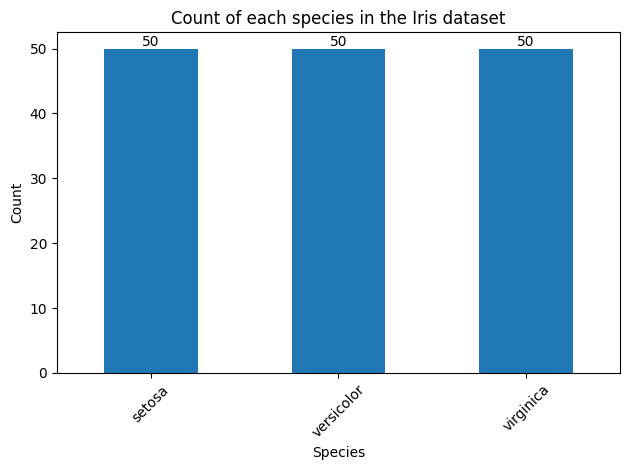

In [ ]:
# Lets also display the count of each species

print("\nCount of each species in the Iris dataset:")
print(iris['species'].value_counts())
# Plot the count of each species
iris['species'].value_counts().plot(kind='bar', title='Count of each species in the Iris dataset')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
# Plot the text on the bars
for i, v in enumerate(iris['species'].value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout() # Adjust layout to prevent clipping of tick-labels
plt.show()

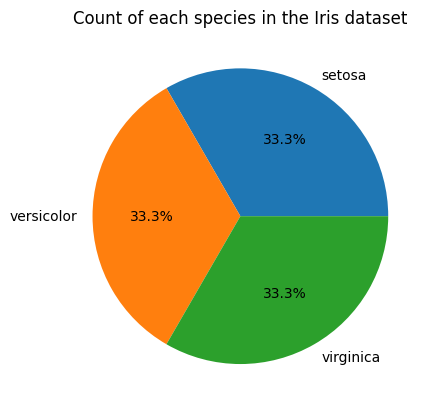

In [ ]:
# Plot the count of each species using pie chart
iris['species'].value_counts().plot(kind='pie', title='Count of each species in the Iris dataset', autopct='%1.1f%%')
plt.ylabel('') # Hide the y-label for pie chart
plt.show()

In [ ]:
iris.head() # Display the first few rows of the dataset again to confirm changes

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Display the datatype of each column
print("\nData types of each column in the Iris dataset:")
print(iris.dtypes)


Data types of each column in the Iris dataset:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [ ]:
# Lets also display the information about the dataset
print("\nInformation about the Iris dataset:")
print(iris.info())


Information about the Iris dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:

print("\nDescriptive statistics of the Iris dataset:")
iris.describe()
# Insight from the descriptive statistics:
# - The sepal length and petal length have a wider range compared to sepal width and petal width.
# - The mean and median values of sepal length and petal length are higher than those of sepal width and petal width.
# - The standard deviation of sepal length and petal length is also higher, indicating more variability in these features.


Descriptive statistics of the Iris dataset:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


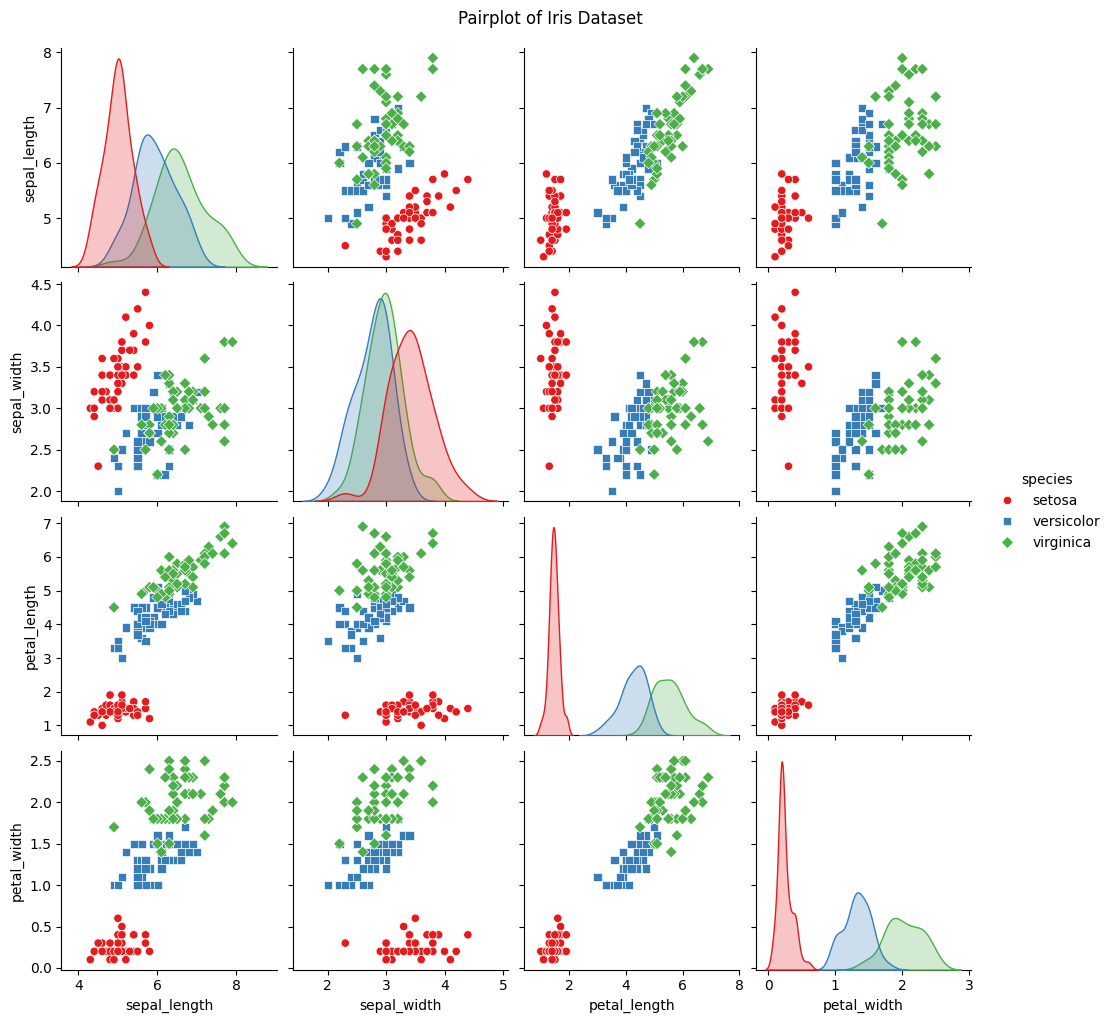

In [ ]:
# Visualize the distribution of each feature
sns.pairplot(iris, hue='species', markers=["o", "s", "D"], palette='Set1')
plt.suptitle('Pairplot of Iris Dataset', y=1.02) # Add a title to the pairplot
plt.show()

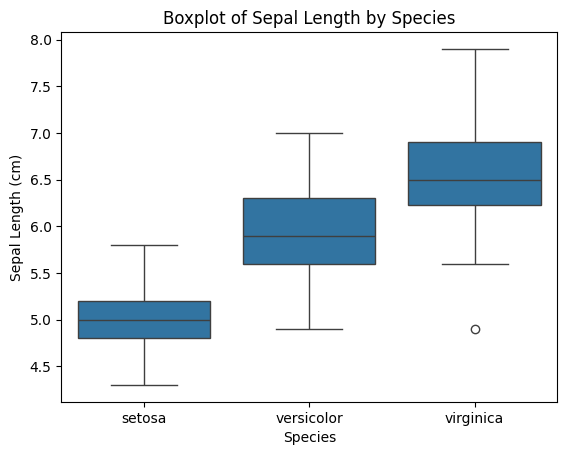

In [ ]:
# Visualize the distribution of each feature using boxplot
sns.boxplot(data=iris, x='species', y='sepal_length')
plt.title('Boxplot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

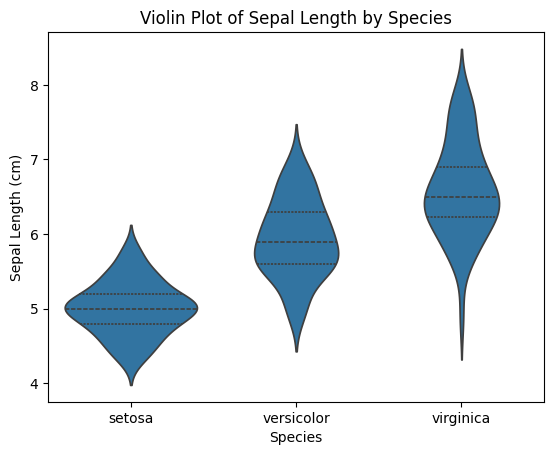

In [ ]:
# Plot the distribution of each feature using violin plot
sns.violinplot(data=iris, x='species', y='sepal_length', inner='quartile')
plt.title('Violin Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

In [ ]:

print("\nMissing values in the Iris dataset:")
iris.isnull().sum().sort_values(ascending=False)
# There are no missing values in the Iris dataset, which is good for our analysis.


Missing values in the Iris dataset:


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
iris.head() # Display the first few rows of the dataset again to confirm changes

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Divide the dataset X and y

In [ ]:
# Divide the dataset into features and target variable
# X = iris.drop('species', axis=1)
# or
# X = iris.loc[:, iris.columns != 'species']  # Select all columns except 'species'
# or
# X = iris.iloc[:, :-1]  # Select all columns except the last one
# or
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Select specific columns

y = iris['species']

In [ ]:
# Lets look at the shape of the features and target variable
print("\nShape of features (X):", X.shape)
print("Shape of target variable (y):", y.shape)


Shape of features (X): (150, 4)
Shape of target variable (y): (150,)


In [ ]:
# Lets look at few rows of the features and target variable
print("\nFirst few rows of features (X):")
X.head()


First few rows of features (X):


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
print("\nFirst few rows of target variable (y):")
print(y.head())


First few rows of target variable (y):
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


## mapping 1st method

In [ ]:
# Encode the target variable
# Way1 - map()
y_new = y.map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
y_new.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [ ]:
# Lets look at value_counts of the encoded target variable
print("\nCount of each encoded species in the Iris dataset:")
print(y_new.value_counts())


Count of each encoded species in the Iris dataset:
species
0    50
1    50
2    50
Name: count, dtype: int64


In [ ]:
y.head()  # Display the first few rows of the target variable again to confirm changes

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

# LabelEncoder 2nd Method

In [ ]:
# Encode the target variable
# Way2 - LabelEncoder from sklearn
# # LabelEncoder is used to convert categorical labels into numerical labels
from sklearn.preprocessing import LabelEncoder # import LabelEncoder class from sklearn.preprocessing module
le = LabelEncoder() # create an instance of LabelEncoder
y = le.fit_transform(y) # fit - study the target variable and transform - convert the target variable into numerical labels
# Display the encoded target variable
print(y)
print("="*100)
print(le.classes_)
# Display the codes assigned to each species
print("\nSpecies codes assigned by LabelEncoder:")
for i, species in enumerate(le.classes_):
    print(f"{species}: {i}")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']

Species codes assigned by LabelEncoder:
setosa: 0
versicolor: 1
virginica: 2


# Train test split

In [ ]:
# Train-test split - 80% train and 20% test
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print the shapes of the training and test sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (120, 4), y_train shape: (120,)
X_test shape: (30, 4), y_test shape: (30,)


In [ ]:
X_train.head()  # Display the first few rows of the training features

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [ ]:
X_train.describe()  # Display the descriptive statistics of the training features

,sepal_length,sepal_width,petal_length,petal_width
count,120.000000,120.000000,120.000000,120.000000
mean,5.809167,3.061667,3.726667,1.183333
std,0.823805,0.449123,1.752345,0.752289
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.750000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.700000,4.400000,6.700000,2.500000


## Standard scaler

In [ ]:
# Scaling the features
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


# Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
# Create an instance of StandardScaler
scaler = StandardScaler()
# Fit and transform on the training set
X_train[features] = scaler.fit_transform(X_train[features])
# Transform the test set using the same scaler
X_test[features] = scaler.transform(X_test[features])

In [ ]:
X_train.describe()  # Display the descriptive statistics of the training features

,sepal_length,sepal_width,petal_length,petal_width
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,6.513308e-16,3.108624e-16,2.960595e-17,-2.960595e-17
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.839628e+00,-2.373778e+00,-1.562535e+00,-1.446088e+00
25%,-8.644522e-01,-5.850598e-01,-1.276006e+00,-1.179118e+00
50%,-7.212234e-02,-1.378803e-01,2.998997e-01,1.557325e-01
75%,7.202076e-01,7.564785e-01,7.869979e-01,8.231577e-01
max,2.304867e+00,2.992376e+00,1.703889e+00,1.757553e+00


# sklearn

In [ ]:
# Model training - Logistic Regression

# class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

# Import LogisticRegression class from sklearn.linear_model
from sklearn.linear_model import LogisticRegression
# Create an instance of LogisticRegression
model = LogisticRegression() # default parameters are used here, but you can customize them as needed
# Fit the model on the training data: fit - study the relationship between X_train and y_train
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predicting on the training
y_pred_train = model.predict(X_train)
# Predicting on the test set
y_pred_test = model.predict(X_test)

# predicted on train


In [ ]:
# Print y_train and y_pred_train side by side using zip
print("\nActual vs Predicted on Train Set:")
list(zip(y_train, y_pred_train))


Actual vs Predicted on Train Set:


[(0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (2, 2),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (2, 2),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (2, 1),
 (2, 2),
 (1, 1),
 (2, 2),
 (1, 1),
 (2, 2),
 (1, 1),
 (0, 0),
 (2, 2),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (2, 2),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (2, 2),
 (0, 0),
 (1, 1),
 (2, 2),
 (0, 0),
 (2, 2),
 (2, 2),
 (1, 1),
 (1, 1),
 (2, 2),
 (1, 1),
 (0, 0),
 (1, 1),
 (2, 2),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 2),
 (0, 0),
 (2, 2),
 (0, 0),
 (0, 0),
 (1, 2),
 (1, 1),
 (2, 2),
 (1, 2),
 (2, 2),
 (2, 2),
 (1, 1),
 (0, 0),
 (0, 0),
 (2, 2),
 (2, 2),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (2, 2),
 (0, 0),
 (2, 2),
 (2, 2),
 (0, 0),
 (1, 1),
 (1, 1),
 (2, 2),
 (1, 1),
 (2, 2),
 (0, 0),
 (2, 2),
 (1, 1),
 (2, 2),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (2, 2),
 (2, 2),
 (0, 0),
 (1, 1),
 (2, 2),
 (2, 2),
 (0, 0),
 (2, 2),
 (0, 0),
 (1, 1),
 (2, 2),
 (2, 2),
 (1, 1),
 (2, 2),
 (1, 1),
 

## predicted on test

In [ ]:
# Print y_test and y_pred_test side by side using zip
print("\nActual vs Predicted on Test Set:")
list(zip(y_test, y_pred_test))


Actual vs Predicted on Test Set:


[(1, 1),
 (0, 0),
 (2, 2),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (2, 2),
 (1, 1),
 (1, 1),
 (2, 2),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (2, 2),
 (1, 1),
 (1, 1),
 (2, 2),
 (0, 0),
 (2, 2),
 (0, 0),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (0, 0),
 (0, 0)]

# accuracy

In [ ]:
# Model evaluation
from sklearn.metrics import accuracy_score
# Calculate accuracy on training data
train_accuracy = accuracy_score(y_train, y_pred_train)
# Calculate accuracy on test data
test_accuracy = accuracy_score(y_test, y_pred_test)
# Print the accuracies
print("\nModel Evaluation:")
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Model Evaluation:
Training Accuracy: 0.97
Test Accuracy: 1.00
